# Prerequisites

- Python
- Machine learning libraries such as Scikit-learn and XGBoost, along with their packages
- NumPy (Numerical Python), Pandas
- Data visualization libraries such as Seaborn and Matplotlib

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("q3_data_for_assignment.csv")

In [4]:
df.head(10) # Starting 10 rows of dataset in pandas dataframe format

,Tree species,TreeHeight_foot,TreeCrown_foot,TreeDBH_cm
0,Lemon,6,4.5,6.687898
1,Lemon,6,4.0,7.002817
2,Lemon,5,4.0,6.366198
3,Lemon,7,5.0,7.002817
4,Lemon,5,4.0,8.594367
5,Lemon,5,4.0,7.002817
6,Lemon,6,4.0,10.504226
7,Lemon,5,3.0,5.729578
8,Lemon,7,5.0,10.185916
9,Lemon,5,4.0,5.729578


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tree species     200 non-null    object 
 1   TreeHeight_foot  200 non-null    int64  
 2   TreeCrown_foot   200 non-null    float64
 3   TreeDBH_cm       200 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.4+ KB


### There are 200 row and 4 columns with no null values
- Hense n need of gap filling
- Tree species column contain text data hense need to covert it into numeric format by using 
- label encoder or OneHotEncoder (commonly used)

In [6]:
df.describe() # statestical information about the dataset 
# Import to understand the data and its numeric features

,TreeHeight_foot,TreeCrown_foot,TreeDBH_cm
count,200.000000,200.000000,200.000000
mean,9.095000,5.940000,10.534365
std,6.832966,2.126384,4.489946
min,3.000000,1.000000,2.547771
25%,7.000000,4.375000,7.002817
50%,9.000000,6.000000,10.191083
75%,10.000000,7.000000,13.136943
max,99.000000,18.500000,31.847134


In [7]:
df.isnull().sum()

Tree species       0
TreeHeight_foot    0
TreeCrown_foot     0
TreeDBH_cm         0
dtype: int64

In [8]:
df['Tree species'].unique()

array(['Lemon', 'Mango', 'Custard apple', 'Orange'], dtype=object)

In [9]:
df['Tree species'].value_counts()
# by lokking at the data there is good balance in data so no need to balancing the data

Tree species
Orange           53
Lemon            50
Mango            50
Custard apple    47
Name: count, dtype: int64

### There are 4 species of tree in dataset 
- Balanced dataset (no need to balance it)
- After the label encoding:
- 0- Custard apple
- 1- Lemon
- 2- Mango
- 3- Orange

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

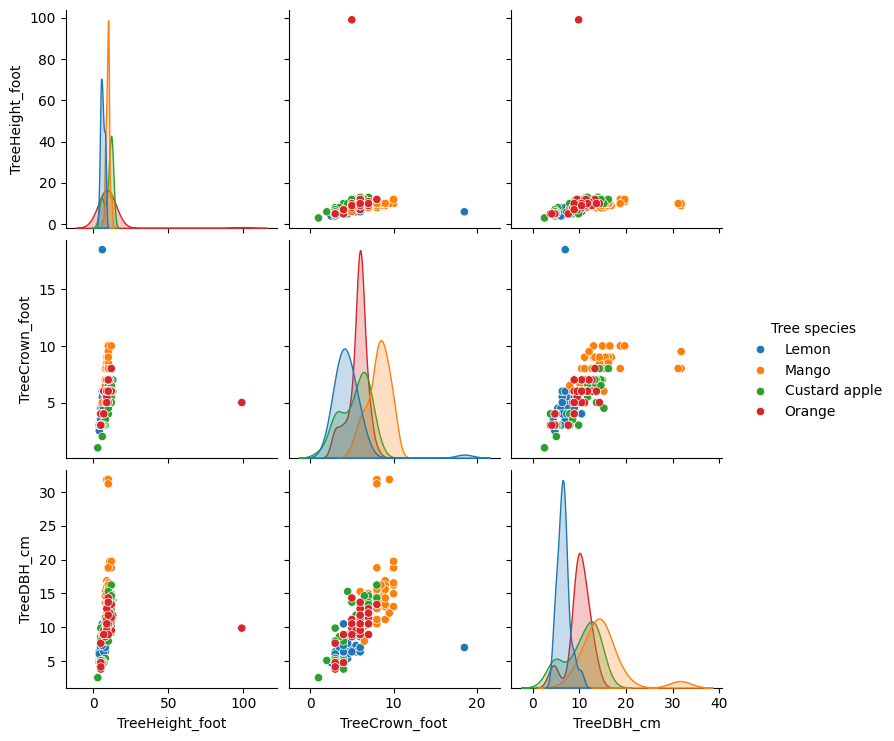

In [11]:
sns.pairplot(df, hue='Tree species')
plt.show()

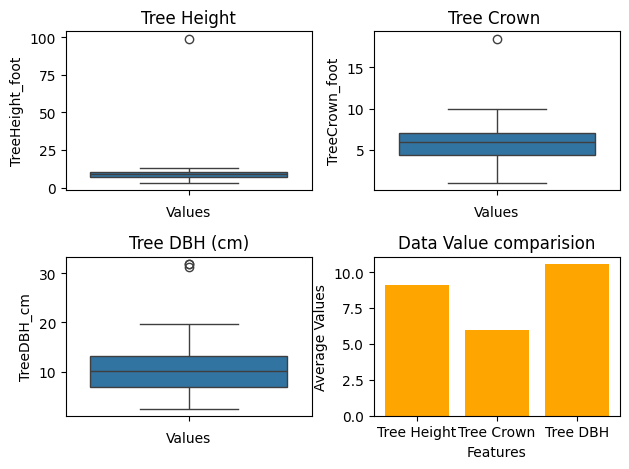

In [12]:
plt.subplot(2, 2, 1)  # (rows, columns, panel number)
sns.boxplot(data=df['TreeHeight_foot'])
plt.title('Tree Height')
plt.xlabel('Values')

plt.subplot(2, 2, 2)
sns.boxplot(data=df['TreeCrown_foot'])
plt.title('Tree Crown ')
plt.xlabel('Values')

plt.subplot(2, 2, 3)
sns.boxplot(data=df['TreeDBH_cm'])
plt.title('Tree DBH (cm)')
plt.xlabel('Values')

plt.subplot(2, 2, 4)
categories = ['Tree Height', 'Tree Crown', 'Tree DBH']
values = [df['TreeHeight_foot'].mean(), df['TreeCrown_foot'].mean(), df['TreeDBH_cm'].mean()]
plt.bar(categories, values, color='orange')
plt.title('Data Value comparision')
plt.xlabel('Features')
plt.ylabel('Average Values')

plt.tight_layout()
plt.show()

### Data visualization 
- Scatter plot - Show the average positive correlation
- Data having little posive skewness
- Box plot - Data contains few outliers
- Bar graph show the Numeric Value difference (Hense needed scaling for few models like SVR)

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["Tree species"] = lb.fit_transform(df["Tree species"])
df.head()

,Tree species,TreeHeight_foot,TreeCrown_foot,TreeDBH_cm
0,1,6,4.5,6.687898
1,1,6,4.0,7.002817
2,1,5,4.0,6.366198
3,1,7,5.0,7.002817
4,1,5,4.0,8.594367


In [14]:
for index, class_name in enumerate(lb.classes_):
    print(f"{class_name}: {index}")

Custard apple: 0
Lemon: 1
Mango: 2
Orange: 3


<Axes: >

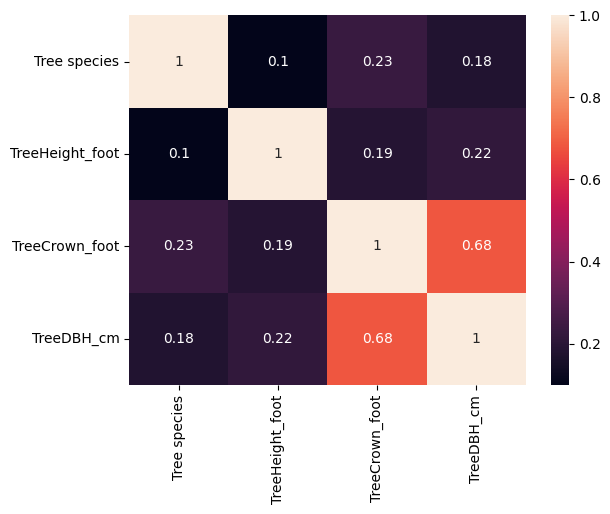

In [15]:
sns.heatmap(df.corr(), annot=True)
## By looking at correlation the TreeCrown_foot feature is more important and Tree species are less important
# but the dataset is very small hense we are hense we are taking all features.

- From Above correlation it seem like TreeCrown_foot is more important feature
- Tree species are less important

In [16]:
df1 =pd.read_csv("q3_data_for_assignment.csv")
X = pd.get_dummies(df1[['Tree species']])
X = X.astype(int)
df1 = pd.concat([df1, X], axis=1)
df1.head()

,Tree species,TreeHeight_foot,TreeCrown_foot,TreeDBH_cm,Tree species_Custard apple,Tree species_Lemon,Tree species_Mango,Tree species_Orange
0,Lemon,6,4.5,6.687898,0,1,0,0
1,Lemon,6,4.0,7.002817,0,1,0,0
2,Lemon,5,4.0,6.366198,0,1,0,0
3,Lemon,7,5.0,7.002817,0,1,0,0
4,Lemon,5,4.0,8.594367,0,1,0,0


# Import models basic

In [17]:
# Model Building (The below models are simple and not tree based)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
svr = SVR(kernel='rbf', C=12, epsilon=0.2)
knn = KNeighborsRegressor(metric='manhattan', n_neighbors = 13, p= 1, weights= 'uniform')

model_r = [lr, ridge, lasso, enet, svr, knn]

# Tree based models

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

dt = DecisionTreeRegressor(max_depth = 4, min_samples_leaf= 1, min_samples_split= 2)
rm = RandomForestRegressor(max_features ='sqrt', min_samples_leaf= 4, min_samples_split= 10, n_estimators= 100, random_state=1234)
gb = GradientBoostingRegressor(learning_rate = 0.02, max_depth= 3, n_estimators=300, subsample=1.0)
xgb = XGBRegressor(n_estimators=90, learning_rate = 0.03, max_depth = 2, subsample = 1.0, gamma = 1)

model_tree = [dt, rm, gb, xgb] 

# model building and model Evaluation Function

In [19]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def model_evaluation(x_train, x_test, y_train, y_test, model_list):
    model_evaluation1 = {
        "model_name" :[],
        "Mean_absolute_error" : [],
        "Mean_squared_error" : [],
        "Root_mean_squared_error" : [],
        "r2_score" :[]
    }
    for model in model_list:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        MAE = mean_absolute_error(y_test, y_pred)
        MSE = mean_squared_error(y_test, y_pred)
        RMSE = np.sqrt(MSE)
        R2 = r2_score(y_test, y_pred)
        model_evaluation1["model_name"].append(model.__class__.__name__)
        model_evaluation1["Mean_absolute_error"].append(MAE)
        model_evaluation1["Mean_squared_error"].append(MSE)
        model_evaluation1["Root_mean_squared_error"].append(RMSE)
        model_evaluation1["r2_score"].append(R2)
    
    model_evaluation1_df = pd.DataFrame(model_evaluation1)
    return model_evaluation1_df

# Data with scaling
- Data is scaled using standard scalar

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = df1.drop(['Tree species', 'TreeDBH_cm'], axis=1)
y = df1['TreeDBH_cm']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
m1 = model_evaluation(X_train_scaled, X_test_scaled, y_train, y_test, model_r)
m1

,model_name,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,r2_score
0,LinearRegression,2.033676,9.762773,3.124544,0.482862
1,Ridge,2.031959,9.752511,3.122901,0.483406
2,Lasso,2.039969,9.755135,3.123321,0.483267
3,ElasticNet,2.028110,9.695961,3.113834,0.486401
4,SVR,1.725532,8.611702,2.934570,0.543835
5,KNeighborsRegressor,2.287647,11.181164,3.343825,0.407730


In [22]:
m2 = model_evaluation(X_train_scaled, X_test_scaled, y_train, y_test, model_tree)
m2

,model_name,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,r2_score
0,DecisionTreeRegressor,2.246457,16.104056,4.012986,0.146962
1,RandomForestRegressor,1.803837,8.306380,2.882079,0.560008
2,GradientBoostingRegressor,2.166368,14.982778,3.870759,0.206357
3,XGBRegressor,1.839425,8.638268,2.939093,0.542428


# Data without scaling

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [24]:
m3 = model_evaluation(X1_train, X1_test, y1_train, y1_test, model_r)
m3

,model_name,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,r2_score
0,LinearRegression,2.033676,9.762773,3.124544,0.482862
1,Ridge,2.002516,9.599309,3.098275,0.491521
2,Lasso,1.972246,9.319270,3.052748,0.506355
3,ElasticNet,1.902087,8.988738,2.998122,0.523863
4,SVR,1.726433,8.337440,2.887463,0.558363
5,KNeighborsRegressor,1.872465,8.302786,2.881456,0.560198


In [25]:
m4 = model_evaluation(X1_train, X1_test, y1_train, y1_test, model_tree)
m4

,model_name,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,r2_score
0,DecisionTreeRegressor,2.246457,16.104056,4.012986,0.146962
1,RandomForestRegressor,1.823836,8.535340,2.921530,0.547880
2,GradientBoostingRegressor,2.178045,15.116016,3.887932,0.199299
3,XGBRegressor,1.839425,8.638268,2.939093,0.542428


# Data without [Tree spacies] feature 
- The tree species are having less correlation hense dropped

In [26]:
# x and y taken from df not df1
x2 = df.drop(['Tree species', 'TreeDBH_cm'], axis=1)
y2 = df['TreeDBH_cm']
X2_train, X2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
m5 = model_evaluation(X2_train, X2_test, y2_train, y2_test, model_r)
m5

,model_name,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,r2_score
0,LinearRegression,2.033676,9.762773,3.124544,0.482862
1,Ridge,2.002516,9.599309,3.098275,0.491521
2,Lasso,1.972246,9.319270,3.052748,0.506355
3,ElasticNet,1.902087,8.988738,2.998122,0.523863
4,SVR,1.726433,8.337440,2.887463,0.558363
5,KNeighborsRegressor,1.872465,8.302786,2.881456,0.560198


# with label encoded data

In [28]:
x3 = df.drop('TreeDBH_cm', axis = 1)
y3 = df['TreeDBH_cm']
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size= 0.3, random_state= 12345)

In [29]:
m6 = model_evaluation(x3_train, x3_test, y3_train, y3_test, model_tree)
m6 

,model_name,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,r2_score
0,DecisionTreeRegressor,1.890187,12.934324,3.596432,0.538365
1,RandomForestRegressor,1.919730,12.776883,3.574477,0.543984
2,GradientBoostingRegressor,1.861708,13.341554,3.652609,0.523831
3,XGBRegressor,1.973025,13.110993,3.620910,0.532059


### With polynomial regression also get maximum r2 score is 0.50
- degree = 2 
- poly = PolynomialFeatures(degree=degree)
- x_train_poly = poly.fit_transform(x_train)
- x_test_poly = poly.transform(x_test)
- Polynomial Regression (Degree 2) Results:
- MAE = 1.9591254284592368
- MSE = 9.295227360598423
- RMSE = 3.048807530920642
- R2 = 0.5076283956833628

# Result Discussion
- All algorithms are used with thier Best Hyperparameters
- Hyperparameter tuning is done seperately using the Grid search cv for better output
- By comapring all Models it seems that
      - The r2 score is between 45 - 55 %
      - Hense we cannot use it for prediction
- The reason behind this output might be
      - Less amount of data
      - Requires more feature (This features are not enough to predict output)
  

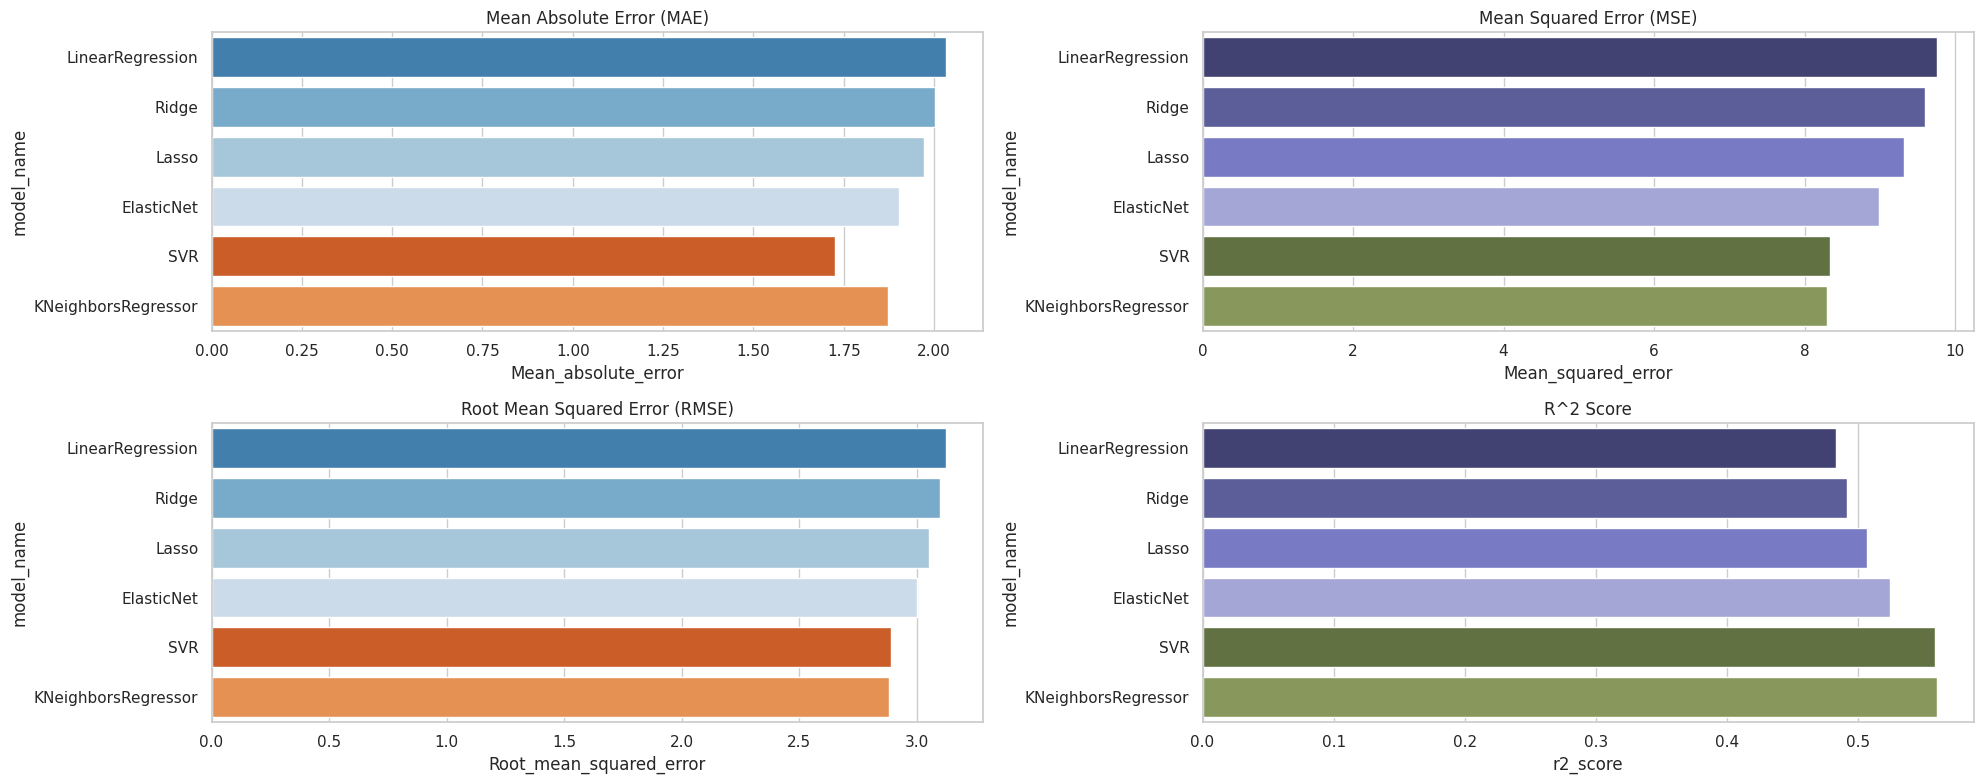

In [30]:
sns.set(style="whitegrid")

def visualize_model_evaluation(evaluation_df):
    plt.figure(figsize=(20, 8))

    plt.subplot(2, 2, 1)
    sns.barplot(x='Mean_absolute_error', y='model_name', data=evaluation_df, palette='tab20c')
    plt.title('Mean Absolute Error (MAE)')
    
    plt.subplot(2, 2, 2)
    sns.barplot(x='Mean_squared_error', y='model_name', data=evaluation_df, palette='tab20b')
    plt.title('Mean Squared Error (MSE)')

    plt.subplot(2, 2, 3)
    sns.barplot(x='Root_mean_squared_error', y='model_name', data=evaluation_df, palette='tab20c')
    plt.title('Root Mean Squared Error (RMSE)')

    plt.subplot(2, 2, 4)
    sns.barplot(x='r2_score', y='model_name', data=evaluation_df, palette='tab20b')
    plt.title('R^2 Score')

    plt.tight_layout()
    
    plt.show()

visualize_model_evaluation(m5)


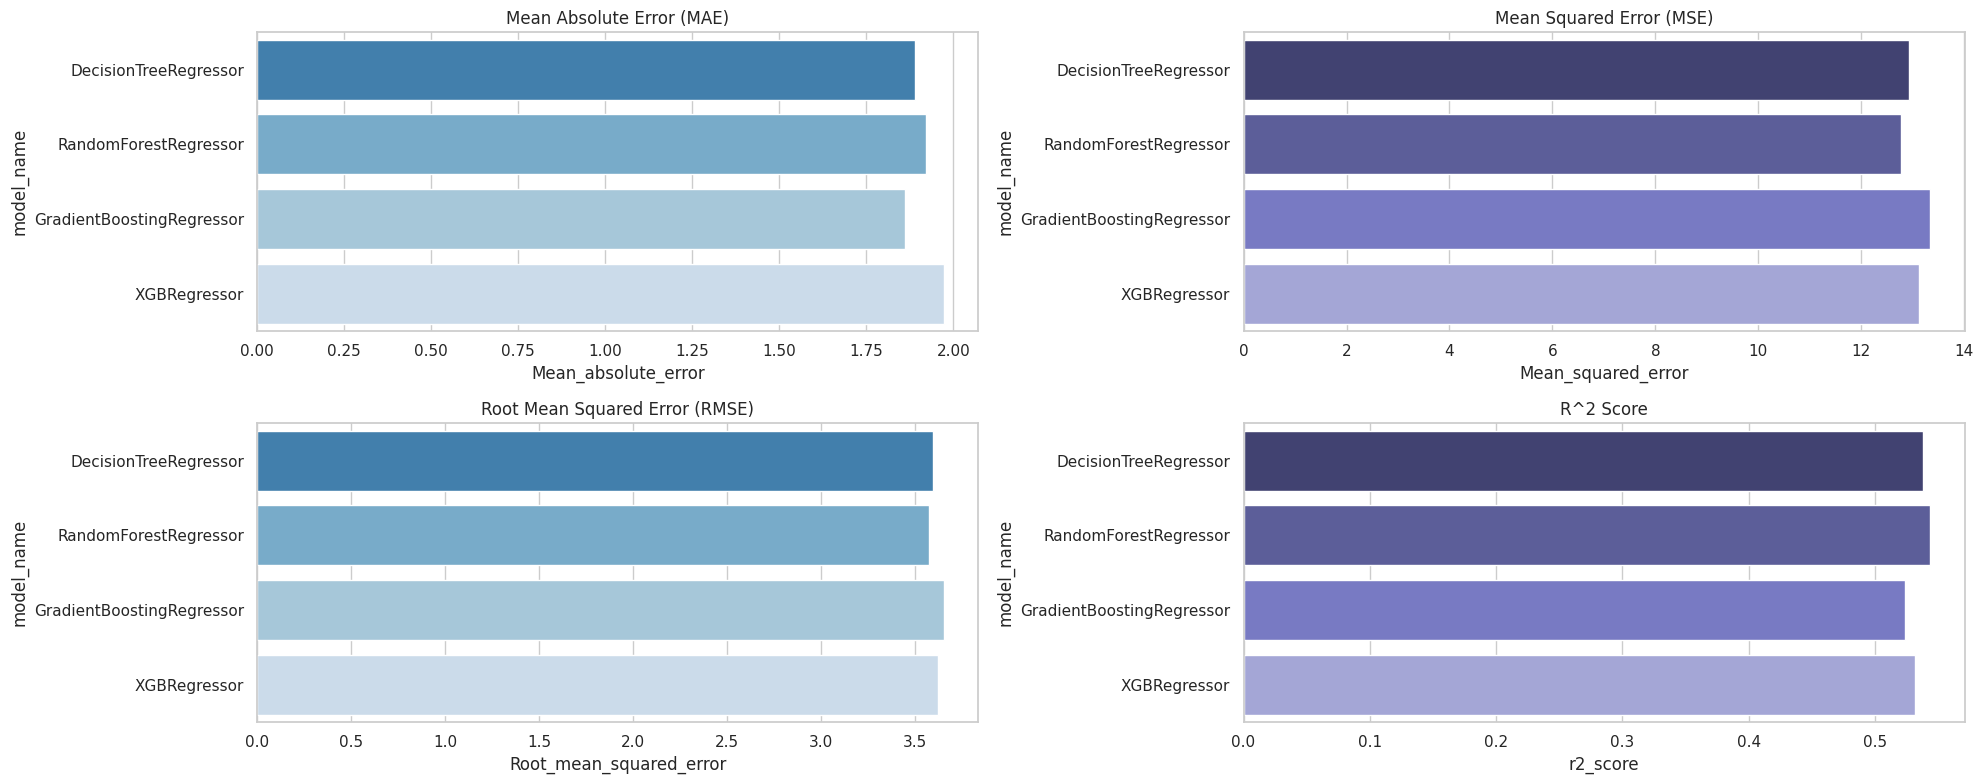

In [31]:
visualize_model_evaluation(m6)

## We can show Result in different types for different Models
### E.g.
- Linear_regression : - Scatter Plot With Best Fit Line
- Support Vector Regressor : - Scatter plot with best fit Hyper Plane
- KNN : - with clustering
- Decision Tree : - Tree map
- But with this result I think there is no use of this result visualization

In [32]:
# To save the trained model using pickle
''' with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt, file)'''

# To load the model later use
'''
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    '''

"\nwith open('decision_tree_model.pkl', 'rb') as file:\n    loaded_model = pickle.load(file)\n    "